In [1]:
import pandas as pd
import numpy as np

<hr>

# **Loading Dataset**

In [2]:
df = pd.read_csv('./Datasets/Health_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<hr>

# **EDA**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.shape

(1338, 7)

- Thus our dataset consists of **1338 observations with 7 features**.

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


- The 7 features are [age, sex, bmi, children, smoker, region, charges].
- **Target variable is 'charges'**.
- Datatypes are of varied types for the features; **smoker and region is Nominal type data requiring OneHotEncoding.**

## Checking for missing values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Thus there arent any Null values in our dataset.

## Converting nonnumerical to numerical form

In [8]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We note that sex,smoker and region are nominal variables with less unique values. Thus we need to OneHotEncode them. 

In [9]:
dfOHE = pd.get_dummies(df)
dfOHE

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [10]:
# backup = df.copy()

## Correlation Heatmap

<AxesSubplot:>

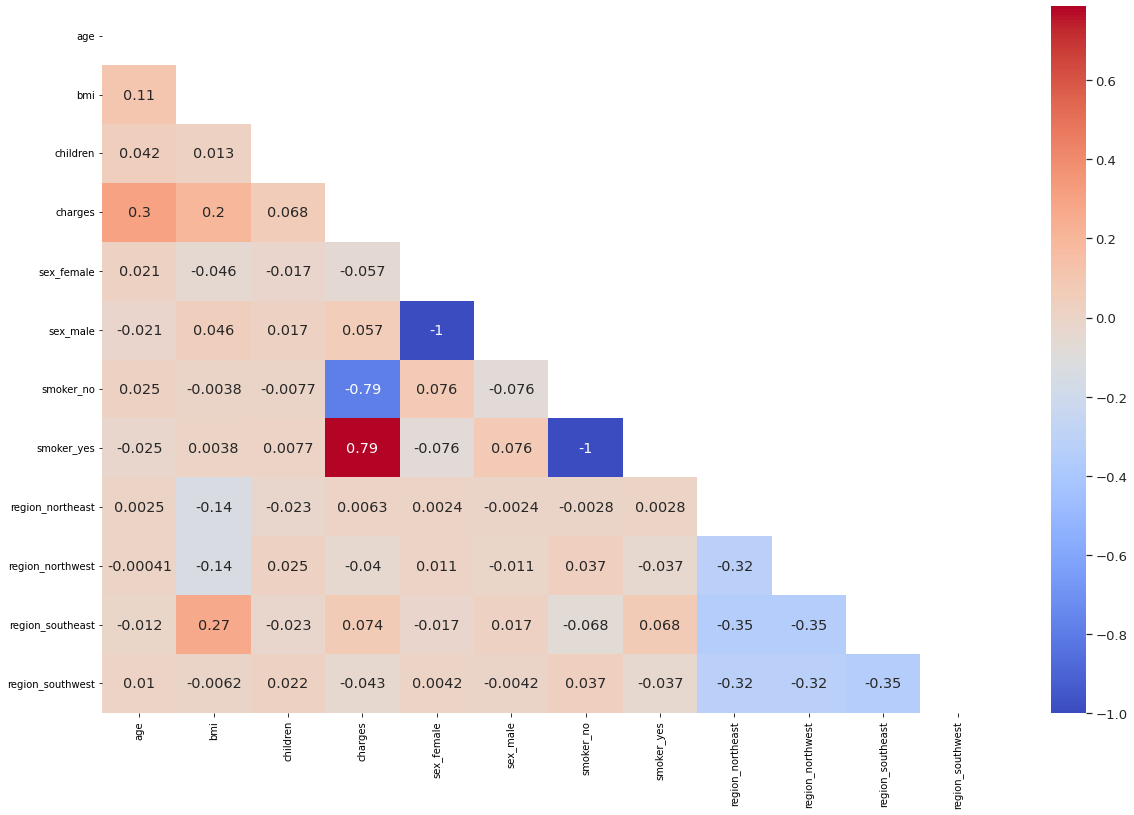

In [11]:
corr = dfOHE.corr()
f, ax = plt.subplots(figsize=(20,13))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm")

Thus we note that
- smoker_yes and charges are highly positively correlated, meaning those who smoke also tend to pay higher charges.
- and there is highly negatice correlation between non-smokers vs charges.

## Pairplot

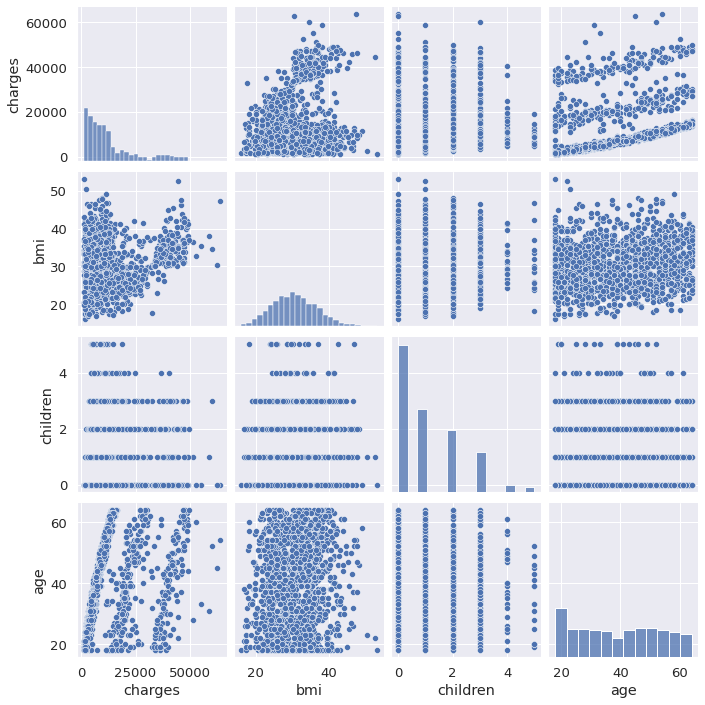

In [12]:
sns.pairplot(df[['charges','bmi','children','age']])
plt.show()

**Inference:**
- The age and charges is positively related.
- The bmi and charge is also related positively.
- bmi appears to follow normal distribution, further investigation can be done.

## Barplots

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

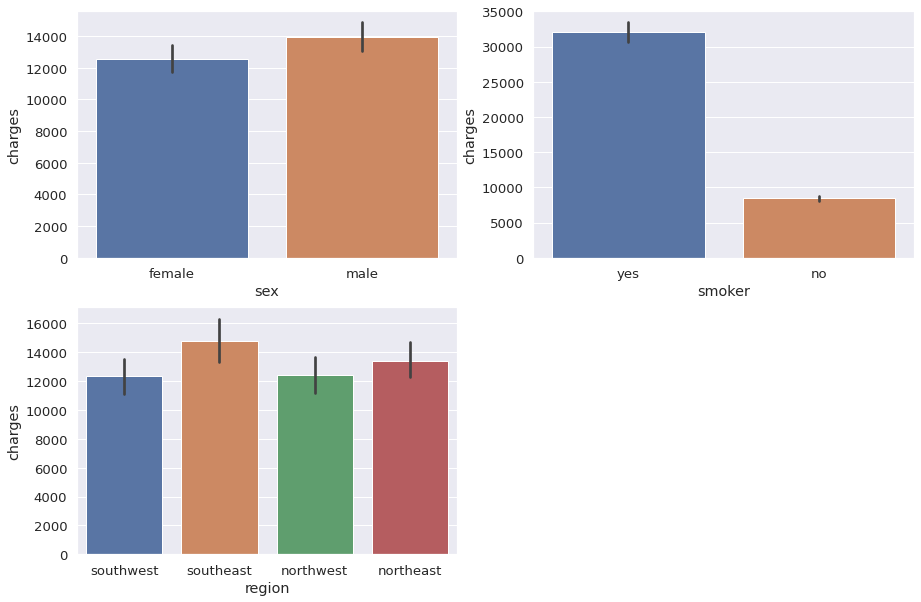

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(2,2,2)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(2,2,3)
sns.barplot(x='region', y='charges', data=df)
plt.show()

**Inference:**
- males pay more tax than females.
- Smokers pay more tax than non-smokers.
- southeast region pays the highest amount of taxes.

## Pieplots

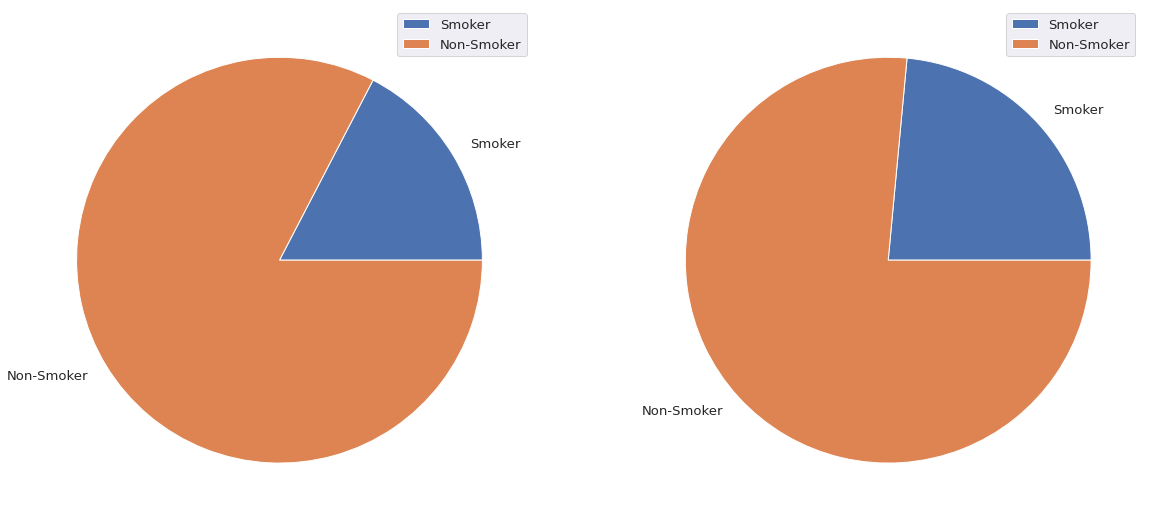

In [15]:
fe_sm = len(df[(df.sex=='female') & (df.smoker=='yes')])
fe_nsm = len(df[(df.sex=='female') & (df.smoker=='no')])
m_sm = len(df[(df.sex=='male') & (df.smoker=='yes')])
m_nsm = len(df[(df.sex=='male') & (df.smoker=='no')])


plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.pie( np.array([fe_sm, fe_nsm]), labels=["Smoker",  "Non-Smoker"] )
plt.legend()
plt.subplot(1,2,2)
plt.pie( np.array([m_sm, m_nsm]), labels=["Smoker",  "Non-Smoker"] )
plt.legend()
plt.show()

## Better Visualizations with Histogram

<AxesSubplot:xlabel='region', ylabel='Count'>

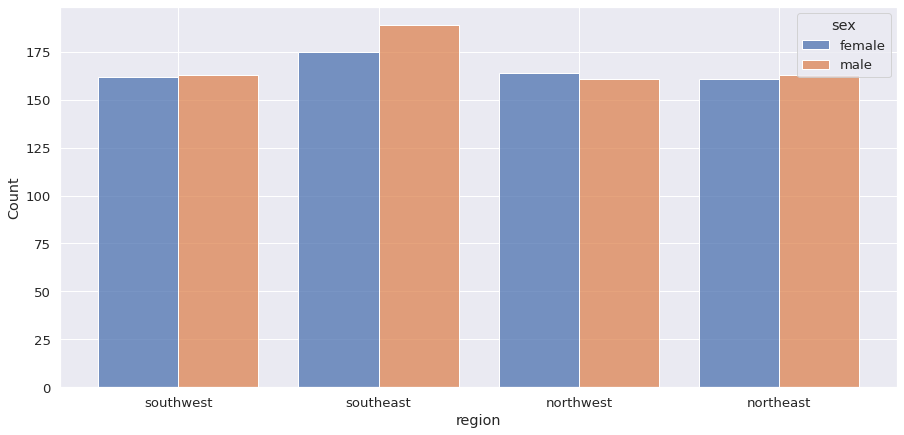

In [16]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='region', hue='sex', multiple='dodge', shrink=.8)

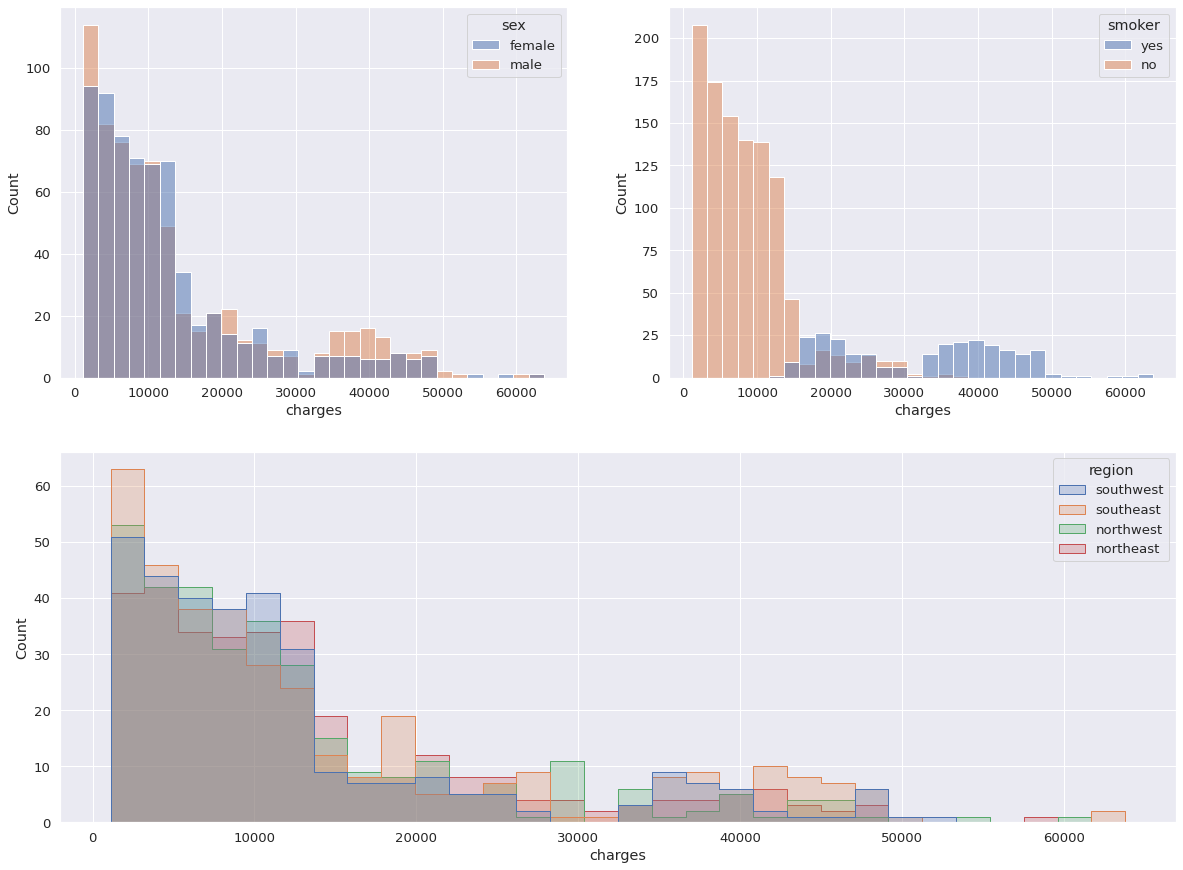

In [17]:

plt.figure(figsize=(20,15))
grid = plt.GridSpec(2,2)
plt.subplot(grid[0,0])
sns.histplot(data=df, x='charges', hue='sex')
plt.subplot(grid[0,1])
sns.histplot(data=df, x='charges', hue='smoker')
plt.subplot(grid[1,:])
sns.histplot(data=df, x='charges', hue='region', element='step')
plt.show()

## Density plots with Histogram

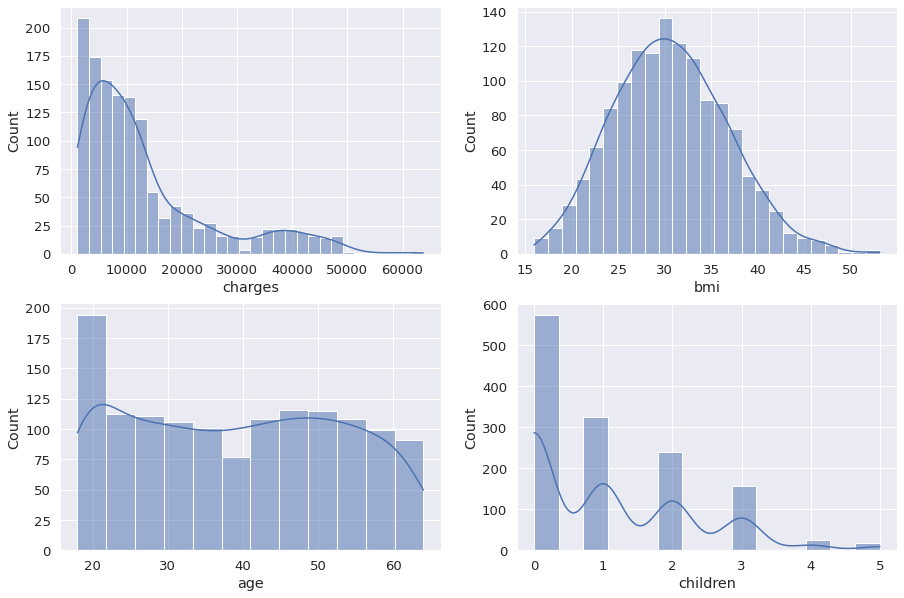

In [18]:
# sns.displot(df[['charges','bmi','children','age']])
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df.charges, kde=True)
plt.subplot(2,2,2)
sns.histplot(df.bmi, kde=True)
plt.subplot(2,2,3)
sns.histplot(df.age, kde=True)
plt.subplot(2,2,4)
sns.histplot(df.children, kde=True)
plt.show()

**Inference:**
- The bmi data appears to be normally distributed with little right skew. More investigation is required.
- Our target variable 'charges' is not normally distributed.

## Boxplots

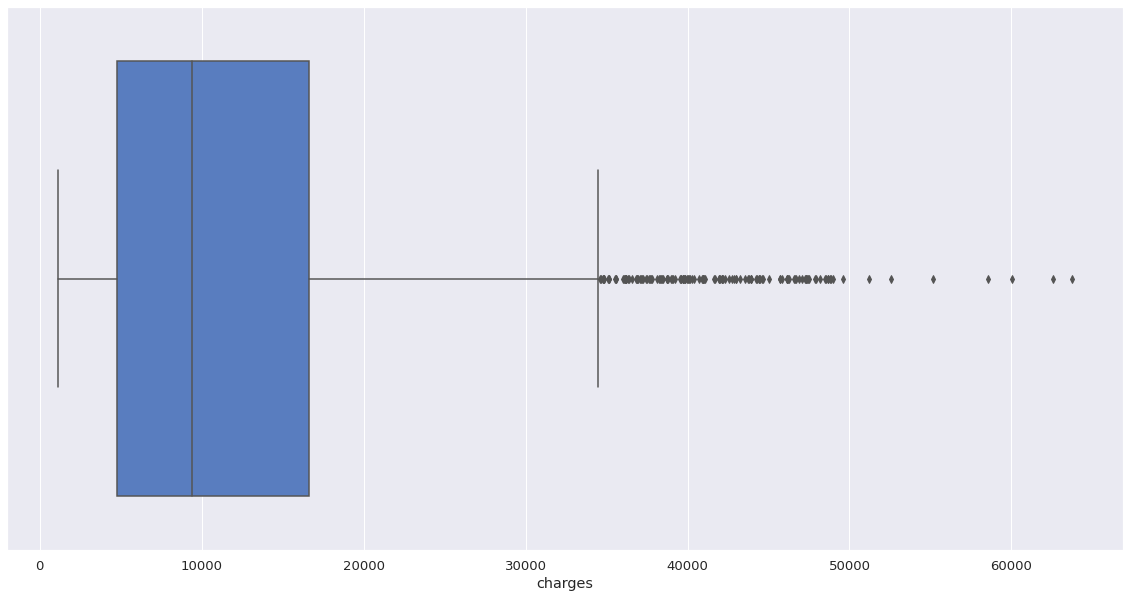

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.charges, palette='muted')
plt.show()